In [1]:
library(survival)
library(ggplot2)
library(dplyr)

Warning message:
“package ‘survival’ was built under R version 4.3.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”
Warning message:
“package ‘dplyr’ was built under R version 4.3.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
dir_fig = 'R_clogit/'

In [15]:
#file_main <- 'main_df_toR_freq05_LRIL_AD5_SAMPLES_AD2_SAMPLES.csv'
#fig_name <- paste(dir_fig, "odds_ratio_clogit_AD5_AD2_clean.png", sep='')

#file_main <- 'main_df_toR_freq05_LRIL_AD4_SAMPLES_AD2_SAMPLES.csv'
#fig_name <- paste(dir_fig, "odds_ratio_clogit_AD4_AD2_clean.png", sep='')

#file_main <- 'main_df_toR_freq05_LRIL_AD3_SAMPLES_AD2_SAMPLES.csv'
#fig_name <- paste(dir_fig, "odds_ratio_clogit_AD3_AD2_clean.png", sep='')

#file_main <- 'main_df_toR_freq05_LRIL_SQ20_SAMPLES_AD2_SAMPLES.csv'
#fig_name <- paste(dir_fig, "odds_ratio_clogit_SQ20_AD2_clean.png", sep='')

#file_main <- 'main_df_toR_freq05_LRIL_SQ30_SAMPLES_AD2_SAMPLES.csv'
#fig_name <- paste(dir_fig, "odds_ratio_clogit_SQ30_AD2_clean.png", sep='')

#file_main <- 'main_df_toR_freq05_LRIL_SQ40_SAMPLES_AD2_SAMPLES.csv'
#fig_name <- paste(dir_fig, "odds_ratio_clogit_SQ40_AD2_clean.png", sep='')

#file_main <- 'main_df_toR_freq05_LRIL_SQ50_SAMPLES_AD2_SAMPLES.csv'
#fig_name <- paste(dir_fig, "odds_ratio_clogit_SQ50_AD2_clean.png", sep='')

#file_main <- 'main_df_toR_freq05_LRIL_SQ60_SAMPLES_AD2_SAMPLES.csv'
#fig_name <- paste(dir_fig, "odds_ratio_clogit_SQ60_AD2_clean.png", sep='')

file_main <- 'main_df_toR_freq05_LRIL_SQ70_SAMPLES_AD2_SAMPLES.csv'
fig_name <- paste(dir_fig, "odds_ratio_clogit_SQ70_AD2_clean.png", sep='')

df_main <- read.table(file_main, header = TRUE, sep = ",")
df_main[,'Platform'] <- as.factor(df_main[,'Platform'])
df_main[,'sex'] <- as.factor(df_main[,'sex'])
print(dim(df_main))
df_main

[1] 243 158


fid,iid,phen,sex,cohort,duo,family,is_eur,PC1,PC2,⋯,count_PLIp9_utr,count_PLIp9_intron,count_LOF_FDR_ASD_cds,count_LOF_FDR_DD_cds,count_LOF_FDR_NDD_cds,count_PLIp9_LOF_DEV_BR_10_cds,count_PLIp9_DEV_BR_GENE_10,count_PLIp9_DEV_BR_GENE_10_cds,count_PLIp9_DEV_BR_GENE_10_utr,count_PLIp9_DEV_BR_GENE_10_intron
<chr>,<chr>,<chr>,<fct>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
F0001,REACH000001,ASD,Male,1,trio,1,1,0.008627126,-0.005607061,⋯,0,48,0,0,0,1,20,1,0,19
F0026,REACH000026,ASD,Male,1,trio,1,0,0.095363540,-0.045229620,⋯,0,43,0,0,0,0,9,0,0,9
F0058,REACH000058,ASD,Male,1,trio,1,1,0.002421759,-0.009216429,⋯,0,32,0,0,0,0,14,0,0,14
F0065,REACH000065,ASD,Male,1,trio,1,0,0.252773800,0.107932900,⋯,0,38,0,0,0,1,13,1,0,12
F0078,REACH000086,ASD,Male,1,trio,2,0,0.044785250,0.038064880,⋯,1,36,0,0,0,0,19,0,1,18
F0078,REACH000089,ASD,Female,1,trio,2,0,0.049879690,0.047204300,⋯,0,25,0,0,0,0,9,0,0,9
F0081,REACH000092,ASD,Female,1,trio,1,1,-0.028510680,-0.001001894,⋯,1,27,0,0,0,0,13,0,0,13
F0081,REACH000095,CON,Female,1,trio,1,1,-0.030440730,-0.002736118,⋯,0,31,0,0,0,1,16,1,0,15
F0083,REACH000097,ASD,Male,1,trio,1,0,0.095793110,0.052887850,⋯,0,45,0,0,0,0,16,0,0,16


In [113]:
### Run this cell if you want to remove case children with SNV calls previously detected
print(dim(df_main))
print('parent case:')
table(df_main[(df_main$rel=='P')&(df_main$Affected=='Yes'),]$SNV_CAR)
print('parent control:')
table(df_main[(df_main$rel=='P')&(df_main$Affected=='No'),]$SNV_CAR)
print('child case:')
table(df_main[(df_main$rel=='C')&(df_main$Affected=='Yes'),]$SNV_CAR)
print('child control:')
table(df_main[(df_main$rel=='C')&(df_main$Affected=='No'),]$SNV_CAR)

df_main_ncar <- df_main %>%
    filter(!((rel=='C') & (Affected=='Yes') & (SNV_CAR==1)))

df_main_car <- df_main %>%
    filter(!((rel=='C') & (Affected=='Yes') & (SNV_CAR==0)))

print(dim(df_main_ncar))
print('not-carrier parent case:')
table(df_main_ncar[(df_main_ncar$rel=='P')&(df_main_ncar$Affected=='Yes'),]$SNV_CAR)
print('not-carrier parent control:')
table(df_main_ncar[(df_main_ncar$rel=='P')&(df_main_ncar$Affected=='No'),]$SNV_CAR)
print('not-carrier child case:')
table(df_main_ncar[(df_main_ncar$rel=='C')&(df_main_ncar$Affected=='Yes'),]$SNV_CAR)
print('not-carrier child control:')
table(df_main_ncar[(df_main_ncar$rel=='C')&(df_main_ncar$Affected=='No'),]$SNV_CAR)

print(dim(df_main_car))
print('carrier parent case:')
table(df_main_car[(df_main_car$rel=='P')&(df_main_car$Affected=='Yes'),]$SNV_CAR)
print('carrier parent control:')
table(df_main_car[(df_main_car$rel=='P')&(df_main_car$Affected=='No'),]$SNV_CAR)
print('carrier child case:')
table(df_main_car[(df_main_car$rel=='C')&(df_main_car$Affected=='Yes'),]$SNV_CAR)
print('carrier child control:')
table(df_main_car[(df_main_car$rel=='C')&(df_main_car$Affected=='No'),]$SNV_CAR)

# activate this for non-carrier case children
#df_main = df_main_ncar
#print(dim(df_main))

# activate this for carrier case children
df_main = df_main_car
print(dim(df_main))

[1] 243 132
[1] "parent case:"



0 
4 

[1] "parent control:"



 0  1 
86 36 

[1] "child case:"



 0  1 
40 38 

[1] "child control:"



 0  1 
28 11 

[1] 205 132
[1] "not-carrier parent case:"



0 
4 

[1] "not-carrier parent control:"



 0  1 
86 36 

[1] "not-carrier child case:"



 0 
40 

[1] "not-carrier child control:"



 0  1 
28 11 

[1] 203 132
[1] "carrier parent case:"



0 
4 

[1] "carrier parent control:"



 0  1 
86 36 

[1] "carrier child case:"



 1 
38 

[1] "carrier child control:"



 0  1 
28 11 

[1] 203 132


In [47]:
sum(df_main$count_FDR_DD_utr)
print(sum(df_main[df_main$Phenotype==1,][,"count_FDR_DD_utr"]))
print(sum(df_main[df_main$Phenotype==0,]$count_FDR_DD_utr))

#sum(df_main$count_FDR_ASD_utr)
#print(sum(df_main[df_main$Phenotype==1,]$count_FDR_ASD_utr))
#print(sum(df_main[df_main$Phenotype==0,]$count_FDR_ASD_utr))

#sum(df_main$count_FDR_DD_cds)
#print(sum(df_main[df_main$Phenotype==1,]$count_FDR_DD_cds))
#print(sum(df_main[df_main$Phenotype==0,]$count_FDR_DD_cds))
#colnames(df_main)

sum(df_main$SNV_CAR)
print(sum(df_main[df_main$Phenotype==1,][,"SNV_CAR"]))
print(sum(df_main[df_main$Phenotype==0,]$SNV_CAR))

[1] 47

[1] 13
[1] 34


[1] 47

[1] 0
[1] 47


In [16]:
### All features
#fts = c('LOF_FDR_ASD_cds', 'LOF_FDR_DD_cds', 'LOF_FDR_NDD_cds', 
#        'LOF_DEV_BR_10_cds', 'PLIp9_LOF_DEV_BR_10_cds', 
#        'LOF_PLIp9_cds', 'LOF_LOWPLI_cds',
#        'FDR_ASD_cds', 'FDR_DD_cds', 'FDR_NDD_cds', 
#        'DEV_BR_GENE_10_cds', 'PLIp9_DEV_BR_GENE_10_cds', 
#        'PLIp9_cds', 'LOWPLI_cds',
#        'FDR_ASD_utr', 'FDR_DD_utr', 'FDR_NDD_utr', 
#        'DEV_BR_GENE_10_utr', 'PLIp9_DEV_BR_GENE_10_utr',
#        'PLIp9_utr', 'LOWPLI_utr',
#        'FDR_ASD_intron', 'FDR_DD_intron', 'FDR_NDD_intron', 
#        'DEV_BR_GENE_10_intron', 'PLIp9_DEV_BR_GENE_10_intron',
#        'PLIp9_intron', 'LOWPLI_intron',
#        'FB_PR', 'FB_ENH', 'GNOCCHI_4', 'GNOCCHI_3', 'GNOCCHI_2')
#fts_labels = c('LOF ASD FDR, CDS', 'LOF DD FDR, CDS', 'LOF NDD FDR, CDS', 
#               'LOF dev. brain genes, CDS', 'LOF dev. brain pLI≥.9 genes, CDS', 
#               'LOF pLI≥.9, CDS', 'LOF pLI≤.9, CDS',
#               'ASD FDR, CDS', 'DD FDR, CDS', 'NDD FDR, CDS', 
#               'dev. brain genes, CDS', 'dev. brain pLI≥.9 genes, CDS', 
#               'pLI≥.9, CDS', 'pLI≤.9, CDS',
#               'ASD FDR, UTR', 'DD FDR, UTR', 'NDD FDR, UTR', 
#               'dev. brain genes, UTR', 'dev. brain pLI≥.9 genes, UTR',
#               'pLI≥.9, UTR', 'pLI≤.9, UTR',
#               'ASD FDR, intron', 'DD FDR, intron', 'NDD FDR, intron', 
#               'dev. brain genes, intron', 'dev. brain pLI≥.9 genes, intron',
#               'pLI≥.9, intron', 'pLI≤.9, intron', 
#               'fetal brain promoter', 'fetal brain enhancer', 'Gnocchi≥4', 'Gnocchi≥3', 'Gnocchi≥2')

### Clean features
fts = c('PLIp9_LOF_DEV_BR_10_cds',
        'LOF_DEV_BR_10_cds',
        'LOF_PLIp9_cds', 
        'LOF_LOWPLI_cds',
        'PLIp9_DEV_BR_GENE_10_cds', 
        'DEV_BR_GENE_10_cds', 
        'PLIp9_cds', 
        'LOWPLI_cds',
        'EV_CONS_EL_BP_1_cds',
        'EV_CONS_EL_BP_50_cds',
        'EV_CONS_EL_BP_100_cds',
        'EV_CONS_EL_FRAC_2_cds',
        'EV_CONS_EL_FRAC_5_cds',
        'EV_CONS_EL_FRAC_10_cds',
        'S_HET_100_cds',
        'S_HET_10_cds',
        'S_HET_1_cds',
        'PLIp9_DEV_BR_GENE_10_utr',
        'DEV_BR_GENE_10_utr', 
        'PLIp9_utr', 
        'LOWPLI_utr',
        'EV_CONS_EL_BP_1_utr',
        'EV_CONS_EL_BP_50_utr',
        'EV_CONS_EL_BP_100_utr',
        'EV_CONS_EL_FRAC_2_utr',
        'EV_CONS_EL_FRAC_5_utr',
        'EV_CONS_EL_FRAC_10_utr',
        'S_HET_100_utr',
        'S_HET_10_utr',
        'S_HET_1_utr',
        'PLIp9_DEV_BR_GENE_10_intron',
        'DEV_BR_GENE_10_intron', 
        'PLIp9_intron', 
        'LOWPLI_intron',
        'EV_CONS_EL_BP_1_ncd',
        'EV_CONS_EL_BP_50_ncd',
        'EV_CONS_EL_BP_100_ncd',
        'EV_CONS_EL_FRAC_2_ncd',
        'EV_CONS_EL_FRAC_5_ncd',
        'EV_CONS_EL_FRAC_10_ncd',
        'S_HET_100_intron',
        'S_HET_10_intron',
        'S_HET_1_intron',
        'FB_PR', 'FB_ENH', 'GNOCCHI_MAX_4', 'GNOCCHI_MAX_3', 'GNOCCHI_MAX_2')
fts_labels = c('LOF dev. brain pLI≥.9 genes, CDS', 
               'LOF dev. brain genes, CDS', 
               'LOF pLI≥.9, CDS', 
               'LOF pLI≤.9, CDS',
               'dev. brain pLI≥.9 genes, CDS', 
               'dev. brain genes, CDS', 
               'pLI≥.9, CDS', 
               'pLI≤.9, CDS',
               'Consv_bp≥1, CDS',
               'Consv_bp≥50, CDS',
               'Consv_bp≥100, CDS',
               'Consv_frc≥.02, CDS',
               'Consv_frc≥.05, CDS',
               'Consv_frc≥.1, CDS',
               'S_het≥0.1, CDS',
               'S_het≥0.01, CDS',
               'S_het≥0.001, CDS',
               'dev. brain pLI≥.9 genes, UTR',
               'dev. brain genes, UTR', 
               'pLI≥.9, UTR', 
               'pLI≤.9, UTR',
               'Consv_bp≥1, UTR',
               'Consv_bp≥50, UTR',
               'Consv_bp≥100, UTR',
               'Consv_frc≥.02, UTR',
               'Consv_frc≥.05, UTR',
               'Consv_frc≥.1, UTR',
               'S_het≥0.1, UTR',
               'S_het≥0.01, UTR',
               'S_het≥0.001, UTR',
               'dev. brain pLI≥.9 genes, intron',
               'dev. brain genes, intron', 
               'pLI≥.9, intron', 
               'pLI≤.9, intron', 
               'Consv_bp≥1, non-CD',
               'Consv_bp≥50, non-CD',
               'Consv_bp≥100, non-CD',
               'Consv_frc≥.02, non-CD',
               'Consv_frc≥.05, non-CD',
               'Consv_frc≥.1, non-CD',
               'S_het≥0.1, intron',
               'S_het≥0.01, intron',
               'S_het≥0.001, intron',
               'fetal brain promoter', 'fetal brain enhancer', 'Gnocchi_max≥4', 'Gnocchi_max≥3', 'Gnocchi_max≥2')
#'Consv_frc≥.1', 'Consv_frc≥.2', 'Consv_frc≥.3'

#null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + Platform + 
#                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')
null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + 
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')

# drop sex
#null_formula = as.formula('Phenotype ~ MEAN_COVERAGE + 
#                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')
# drop PCs
#null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + 
#                          strata(fid)')
# drop coverage
#null_formula = as.formula('Phenotype ~ sex +
#                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')
# drop PCs and sex
#null_formula = as.formula('Phenotype ~ MEAN_COVERAGE  +
#                          strata(fid)')
# drop PCs and cov
#null_formula = as.formula('Phenotype ~ sex  +
#                          strata(fid)')

ORs = c()
ORs_plus = c()
ORs_minus = c()
log_ORs = c()
log_ORs_plus = c()
log_ORs_minus = c()
pvals = c()
ano_pvals = c()
sum_cases = c()
sum_controls = c()
#for (ft in fts[c(23:23)]) {
#for (i_ft in seq_along(fts[c(4:4)])) {
#for (i_ft in seq_along(fts)) {
for (ft in fts) {
    var = paste('count_', ft, sep="")
    print(var)

    sum_case = sum(df_main[df_main$Phenotype==1,][,var])
    sum_control = sum(df_main[df_main$Phenotype==0,][,var])
    sum_cases = c(sum_cases, sum_case)
    sum_controls = c(sum_controls, sum_control)
    
    #model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + Platform + 
    #                                 PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + 
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    # drop sex
    #model_formula = as.formula(paste('Phenotype ~', var, '+ MEAN_COVERAGE + 
    #                                 PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    # drop PCs
    #model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + 
    #                                  strata(fid)'))
    # drop coverage
    #model_formula = as.formula(paste('Phenotype ~', var, '+ sex + 
    #                                 PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    # drop PCs and sex
    #model_formula = as.formula(paste('Phenotype ~', var, '+ MEAN_COVERAGE +
    #                                  strata(fid)'))
    # drop PCs and cov
    #model_formula = as.formula(paste('Phenotype ~', var, '+ sex +
    #                                  strata(fid)'))
    
    null_model <- clogit(null_formula, data = df_main)
    #print(summary(null_model))

    clogit_model <- clogit(model_formula, data = df_main)
    #print(summary(clogit_model))
    #print(str(summary(clogit_model)))
    OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
    OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
    OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    ORs = c(ORs, OR)
    ORs_plus = c(ORs_plus, OR_plus)
    ORs_minus = c(ORs_minus, OR_minus)
    log_ORs = c(log_ORs, log_OR)
    log_ORs_plus = c(log_ORs_plus, log_OR_plus)
    log_ORs_minus = c(log_ORs_minus, log_OR_minus)
    pvals = c(pvals, pval)
    
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]
    ano_pvals = c(ano_pvals, ano_pval)
    #print(str(summary(ano)))
    #print(ano)
    #print(str(ano))

    # simple logistic regression
    #logit_formula <- as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + 
    #                                 PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10'))
    #logit_model <- glm(logit_formula, data = df_main, family = "binomial")
    #print(summary(logit_model))
}

sum_case_controls = paste(as.character(sum_cases), as.character(sum_controls), sep='/')

print('ORs:')
print(ORs)
print('ORs_plus:')
print(ORs_plus)
print('ORs_minus:')
print(ORs_minus)
print('log_ORs:')
print(log_ORs)
print('log_ORs_plus:')
print(log_ORs_plus)
print('log_ORs_minus:')
print(log_ORs_minus)
print('pvals:')
print(pvals)
print('ano_pvals:')
print(ano_pvals)
print('sum_cases:')
print(sum_cases)
print('sum_controls:')
print(sum_controls)
print('sum_case_controls:')
print(sum_case_controls)

[1] "count_PLIp9_LOF_DEV_BR_10_cds"
[1] "count_LOF_DEV_BR_10_cds"
[1] "count_LOF_PLIp9_cds"
[1] "count_LOF_LOWPLI_cds"
[1] "count_PLIp9_DEV_BR_GENE_10_cds"
[1] "count_DEV_BR_GENE_10_cds"
[1] "count_PLIp9_cds"
[1] "count_LOWPLI_cds"
[1] "count_EV_CONS_EL_BP_1_cds"
[1] "count_EV_CONS_EL_BP_50_cds"
[1] "count_EV_CONS_EL_BP_100_cds"
[1] "count_EV_CONS_EL_FRAC_2_cds"
[1] "count_EV_CONS_EL_FRAC_5_cds"
[1] "count_EV_CONS_EL_FRAC_10_cds"
[1] "count_S_HET_100_cds"
[1] "count_S_HET_10_cds"
[1] "count_S_HET_1_cds"
[1] "count_PLIp9_DEV_BR_GENE_10_utr"
[1] "count_DEV_BR_GENE_10_utr"
[1] "count_PLIp9_utr"
[1] "count_LOWPLI_utr"
[1] "count_EV_CONS_EL_BP_1_utr"
[1] "count_EV_CONS_EL_BP_50_utr"
[1] "count_EV_CONS_EL_BP_100_utr"
[1] "count_EV_CONS_EL_FRAC_2_utr"
[1] "count_EV_CONS_EL_FRAC_5_utr"
[1] "count_EV_CONS_EL_FRAC_10_utr"
[1] "count_S_HET_100_utr"
[1] "count_S_HET_10_utr"
[1] "count_S_HET_1_utr"
[1] "count_PLIp9_DEV_BR_GENE_10_intron"
[1] "count_DEV_BR_GENE_10_intron"
[1] "count_PLIp9_intron"
[1

In [17]:
#my_data = data.frame('ests' = ests, 'stds' = stds, 'fts' = unlist(fts), 'glm_pval' = pvals, 'ano_pval' = ano_pvals)
my_data = data.frame('ORs' = ORs, 'ORs_plus' = ORs_plus, 'ORs_minus' = ORs_minus,  
                     'log_ORs' = log_ORs, 'log_ORs_plus' = log_ORs_plus, 'log_ORs_minus' = log_ORs_minus,  
                     'fts' = fts, 'fts_labels' = fts_labels, 'clogit_pval' = pvals, 'ano_pval' = ano_pvals, 'sum_case_con' = sum_case_controls)
my_data$fts <- factor(my_data$fts, levels = my_data$fts)
my_data <- my_data[!is.infinite(my_data$ORs_plus),]
get_pval_char <- function(pval) {
    if (pval>0.05) {return('')}
    if ((pval<0.05) && (pval>0.01)) {return('*')}
    else if ((pval<0.01) && (pval>0.001)) {return('**')}
    else {return('***')}
    }
anova_sig <- sapply(my_data$ano_pval, get_pval_char)
print(anova_sig)
my_data$ano_sig = anova_sig
my_data

 [1] ""   ""   ""   ""   ""   ""   ""   ""   ""   ""   ""   ""   ""   ""   ""  
[16] ""   ""   ""   ""   ""   ""   ""   ""   ""   ""   ""   ""   ""   "*"  "**"
[31] ""   ""   ""   ""   ""   ""   ""   ""   ""   ""   ""   ""   ""   ""   ""  
[46] ""   "*"  ""  


,ORs,ORs_plus,ORs_minus,log_ORs,log_ORs_plus,log_ORs_minus,fts,fts_labels,clogit_pval,ano_pval,sum_case_con,ano_sig
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,1.4719632,3.702196,0.5852407,0.386597025,0.857181720,-0.0839876703,PLIp9_LOF_DEV_BR_10_cds,"LOF dev. brain pLI≥.9 genes, CDS",0.41134737,0.410520065,29/50,
2,1.1876719,2.034130,0.6934486,0.171994967,0.446527107,-0.1025371732,LOF_DEV_BR_10_cds,"LOF dev. brain genes, CDS",0.53098565,0.531460140,62/122,
3,1.2050033,2.222519,0.6533277,0.186482290,0.498813940,-0.1258493596,LOF_PLIp9_cds,"LOF pLI≥.9, CDS",0.55046400,0.551077307,49/94,
4,1.0280166,1.263274,0.8365705,0.027631335,0.132773969,-0.0775112994,LOF_LOWPLI_cds,"LOF pLI≤.9, CDS",0.79270583,0.792808936,278/549,
5,1.8752674,4.184135,0.8404671,0.628751289,1.038222487,0.2192800906,PLIp9_DEV_BR_GENE_10_cds,"dev. brain pLI≥.9 genes, CDS",0.12465610,0.120223965,41/68,
6,1.2365352,1.975688,0.7739173,0.212313314,0.451401145,-0.0267745175,DEV_BR_GENE_10_cds,"dev. brain genes, CDS",0.37453328,0.372647949,78/156,
7,1.4539847,2.511770,0.8416659,0.374307831,0.653231303,0.0953843588,PLIp9_cds,"pLI≥.9, CDS",0.17960468,0.174346321,72/124,
8,1.0396317,1.249098,0.8652913,0.038866486,0.132518981,-0.0547860097,LOWPLI_cds,"pLI≤.9, CDS",0.67813643,0.677991384,361/711,
9,1.1159540,1.357804,0.9171821,0.109709674,0.209792571,0.0096267770,EV_CONS_EL_BP_1_cds,"Consv_bp≥1, CDS",0.27299650,0.270045641,357/685,


[1] "R_clogit/odds_ratio_clogit_SQ70_AD2_clean.png"


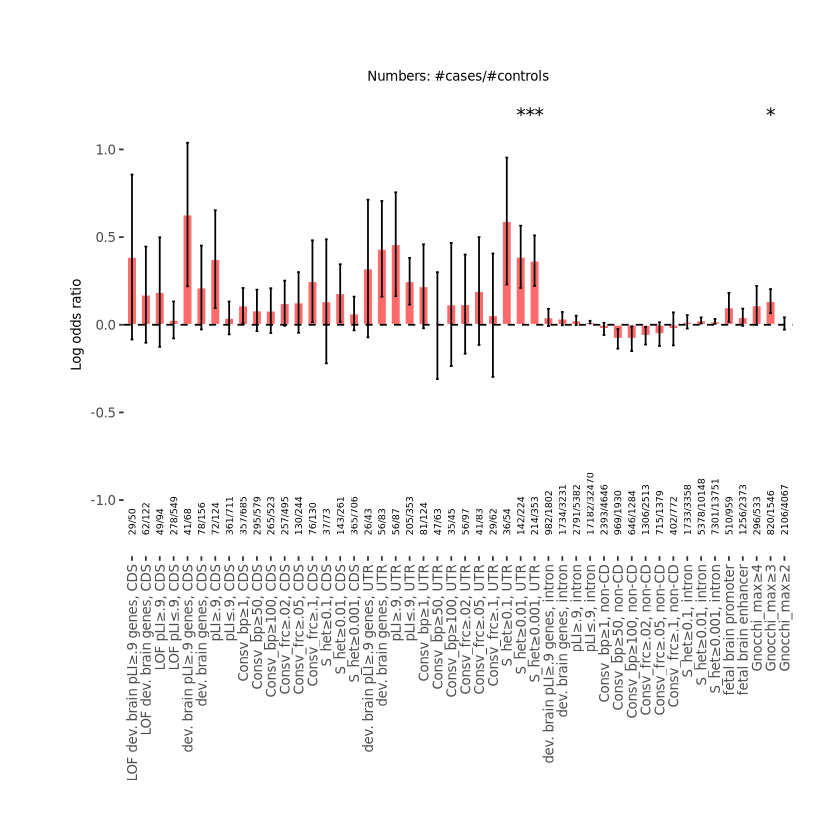

In [18]:
print(fig_name)
#y_sig = .05
#y_sig = 0.75
#y_sig = 0.3
y_sig = 1.2
#y_sig = 1.2
#y_sig = 1.7
size_txt = 8
size_sig = 4
label_pos = -1.2

#ggplot(my_data, aes(x = fts, y = ORs, label = sprintf('%1.4f', ano_pval))) +
ggplot(my_data, aes(x = fts, y = log_ORs, label = sum_case_con)) +
  geom_bar(stat = "identity", fill = "indianred1", color = "white", width = 0.7) +
  geom_errorbar(aes(ymin = log_ORs_minus, ymax = log_ORs_plus), width = 0.2) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
  labs(y = "Log odds ratio", title = "Numbers: #cases/#controls") +
  theme(axis.text=element_text(size=size_txt),
        axis.text.x = element_text(angle = 90, vjust = .5, hjust=1, size=size_txt),
        axis.title.x = element_blank(),
        axis.title.y = element_text(size=size_txt),
        plot.margin = margin(t = 1.5, l = 1.5, r = 1, b = 1, "cm"),
        panel.background = element_blank(),
        plot.title = element_text(hjust = 0.5, size=size_txt)
        #axis.line = element_line(),
       ) +
  scale_x_discrete(labels=my_data$fts_labels) +
  annotate("text", x=1:dim(my_data)[1], y=y_sig, label= anova_sig, size=size_sig) +
  geom_text(aes(x = fts, y = label_pos, label = sum_case_con), angle=90, hjust=0, size=2)
  # + 
  #ylim(-0.1, .46)
#, vjust=0, hjust=2

ggsave(fig_name, width = 5, height = 5)

  #geom_text(vjust=0, angle=45) +
#axis.text=element_text(size=12),
#
#geom_bar(stat = "identity", fill = "lightblue", color = "black") +